<br>
<font>
<div dir="ltr" align="center">
    <br>
    <font color="#E74C3C" size="7" style="font-family:Arial, sans-serif;">
        Kernels, Filters, and Convolution <br>
    </font>
    <font color="#2980B9" size="5" style="font-family:Arial, sans-serif;">
        Computer Vision <br>
    </font>
    <font color="#2980B9" size="5" style="font-family:Arial, sans-serif;">
        Mahdi Seyfipoor <br>
    </font>
</div>


<br>
<font>
<div dir="ltr" align="center">
    <br>
    <font color="green" size="7" style="font-family:Arial, sans-serif;">
        Section #1<br>
    </font>
</div>


<h1 style="line-height:200%; font-family: Arial, sans-serif; color: #007acc; text-align: left;">
    <font face="Arial" color="#007acc">
        1D Convolution
    </font>
</h1>


1D convolution is a powerful technique widely used in machine learning, particularly in the analysis of sequential data like time-series signals, speech, and even stock prices. At its core, 1D convolution works by sliding a filter or kernel over a sequence of data points to detect patterns, extract features, or smooth the data. Unlike 2D convolution, which operates on grids (such as images), 1D convolution works on one-dimensional sequences, making it well-suited for problems where data is ordered in time or space.

<h2 style="line-height:200%; font-family: Arial, sans-serif; color: #007acc; text-align: left;">
    <font face="Arial" color="#007acc">
        How 1D Convolution Works
    </font>
</h2>


The basic idea of 1D convolution involves applying a kernel to a sequence of values. The kernel slides over the input sequence, performing element-wise multiplications followed by a sum. This produces a new sequence that highlights certain features based on the kernel used. For example, in time-series analysis, different kernels can detect trends, seasonal patterns, or sharp changes in the data.


The result of 1D convolution is a feature map, which is another sequence that represents important aspects of the input sequence. Depending on the choice of kernel, stride (the step size at which the kernel moves), and padding (how edges of the sequence are handled), 1D convolution can either downsample or retain the size of the original sequence.

There are various approaches to implementing 1D convolution, each with its own trade-offs in terms of computational efficiency and feature extraction. These approaches can be adapted to suit specific tasks and data characteristics.


<h2 style="line-height:200%; font-family: Arial, sans-serif; color: #007acc; text-align: left;">
    <font face="Arial" color="#007acc">
        Applications of 1D Convolution
    </font>
</h2>


1D convolution is applied in a variety of fields, making it a versatile tool in machine learning:

* <strong>Stock Price Prediction:</strong> 1D convolution is used to analyze historical price data and detect patterns such as upward or downward trends. By convolving over sequences of stock prices, it can capture short-term patterns (e.g., daily fluctuations) or long-term trends (e.g., month-to-month performance). Combining 1D convolution with models like LSTM allows for deeper insights into market behavior.

* <strong>Speech Processing:</strong> In speech recognition and emotion detection, 1D convolution is used to process raw audio signals. The kernels can identify patterns related to speech phonemes, tones, and even emotional cues. By applying multiple 1D convolutional layers, models can hierarchically extract more complex features from speech data, improving the accuracy of tasks like voice identification or sentiment analysis.

* <strong>Time-Series Analysis:</strong> 1D convolution is essential in analyzing time-series data from various domains, including healthcare (e.g., analyzing heart rate variability), industrial monitoring (e.g., detecting anomalies in sensor data), and environmental science (e.g., analyzing weather patterns). The convolutional operation helps in detecting recurring patterns, sudden changes, or seasonal variations, making it a powerful tool for forecasting.

* <strong>Text Processing:</strong> Although less common, 1D convolution can also be applied to text data. By treating words or characters as a sequence, convolutional models can extract features related to word context or sentence structure. This can be useful for natural language processing tasks such as sentiment analysis or topic classification.



For understanding the mathematics behind 1D convolution, We recommend watching this <a href="https://www.youtube.com/watch?v=KuXjwB4LzSA&t=443s" target="_blank" style="color:#007acc;">YouTube video</a>.


In [ ]:
import numpy as np


def convolve_1d_two_loops(signal, kernel):
    """
    Convolve a 1D signal with a kernel using two loops.
    Args:
        signal: 1D array representing the input signal.
        kernel: 1D array representing the filter to apply to the signal.
    Returns:
        output: 1D array representing the convolution result.
    """
    signal_length = len(signal)
    kernel_length = len(kernel)
    buffer = kernel_length // 2

    # Expand the sequence boundaries with zero values
    augmented_sequence = np.pad(signal, (buffer, buffer), 'constant', constant_values=0)

    # Invert the order of the mask elements
    inverted_mask = kernel[slice(None, None, -1)]

    processed_length = signal_length
    result_vector = np.zeros(processed_length)

    # Iterate through the sequence to apply the mask
    for index in range(processed_length):
        cumulative_value = 0
        # Iterate through the mask elements for each position in the sequence
        for offset in range(kernel_length):
            sequence_index = index + offset
            sequence_factor = augmented_sequence[sequence_index]
            mask_factor = inverted_mask[offset]
            cumulative_value += sequence_factor * mask_factor
        result_vector[index] = cumulative_value

    return result_vector

<div dir=rtl>

این تابع با استفاده از دو حلقه، کانولوشن یک سیگنال یک‌بعدی با یک کرنل را انجام می‌دهد. ابتدا سیگنال با صفرها حاشیه‌گذاری شده و کرنل معکوس می‌شود. سپس، دو حلقه تودرتو روی سیگنال حاشیه‌گذاری شده و کرنل می‌چرخند، عناصر متناظر ضرب شده و در آرایه خروجی جمع می‌شوند. نتیجه نهایی، آرایه کانولوشن‌شده است.

</div>

In [ ]:
import numpy as np
from numpy.lib.stride_tricks import as_strided

def convolve_1d_one_loops(signal, kernel):
    """
    Convolve a 1D signal with a kernel using a single loop (optimized version).
    Args:
        signal: 1D array representing the input signal.
        kernel: 1D array representing the filter to apply to the signal.
    Returns:
        output: 1D array representing the convolution result.
    """
    signal_len = len(signal)
    kernel_len = len(kernel)
    pad_size = kernel_len // 2

    # Zero-pad the signal
    padded_signal = np.pad(signal, (pad_size, pad_size), 'constant', constant_values=0)

    # Reverse the kernel
    reversed_kernel = kernel[::-1]

    output_len = signal_len
    output = np.zeros(output_len)

    # Use stride tricks to create a view of the padded signal
    strides = padded_signal.strides[0]
    shape = (output_len, kernel_len)
    strided_view = as_strided(padded_signal, shape=shape, strides=(strides, strides))

    # Perform the convolution using a single loop and matrix multiplication
    for i in range(output_len):
        output[i] = np.dot(strided_view[i], reversed_kernel)

    return output

<div dir=rtl>

   این تابع کانولوشن یک سیگنال یک‌بعدی با یک کرنل را با استفاده از یک حلقه و تکنیک‌های پیشرفته NumPy انجام می‌دهد. ابتدا سیگنال با صفرها حاشیه‌گذاری شده و کرنل معکوس می‌شود. سپس، از as_strided برای ایجاد یک "نمای" کارآمد از سیگنال حاشیه‌گذاری شده استفاده می‌شود که پنجره‌های لغزنده را بدون کپی کردن داده‌ها نشان می‌دهد. در نهایت، با استفاده از np.dot، حاصلضرب داخلی بین هر پنجره و کرنل معکوس شده محاسبه شده و نتیجه در آرایه خروجی ذخیره می‌شود. این روش نسبت به استفاده از دو حلقه سنتی، بهینه‌تر است.
</div>

In [ ]:
import numpy as np

def convolve_1d_dot(signal, kernel):
    """
    Convolve a 1D signal with a kernel using np.dot (fast and vectorized).
    Args:
        signal: 1D array representing the input signal.
        kernel: 1D array representing the filter to apply to the signal.
    Returns:
        output: 1D array representing the convolution result.
    """
    signal = np.asarray(signal)
    # Flip the kernel for convolution
    kernel = np.asarray(kernel)[::-1]

    output_length = len(signal) - len(kernel) + 1
    output = np.zeros(output_length)

    # Create a matrix where each row is a segment of the signal
    for i in range(output_length):
        segment = signal[i:i + len(kernel)]
        # Perform dot product
        output[i] = np.dot(segment, kernel)
    return output


<div dir=rtl>

این کد پیاده‌سازی کانولوشن یک‌بعدی سیگنال با استفاده از محصول داخلی (dot product) و با به‌کارگیری تکنیک‌های بهینه‌شده است. با استفاده از np.pad، سیگنال ورودی به‌طور خودکار در ابتدا و انتهای خود با صفر پد می‌شود تا نتایج کانولوشن برای تمام بخش‌ها به‌درستی محاسبه شود. همچنین، با استفاده از تابع as_strided از کتابخانه numpy، نمایی از سیگنال پد شده ایجاد می‌شود که باعث تسریع در پردازش و کاهش مصرف حافظه می‌شود. در نهایت، محصول داخلی بین نمای سیگنال و کرنل معکوس‌شده محاسبه می‌شود تا نتیجه کانولوشن به‌دست آید. این روش نسبت به استفاده از حلقه‌های تو در تو بسیار سریع‌تر و بهینه‌تر است.
</div>


In [ ]:
import numpy as np

def fft_convolve_vectorized(signal, kernel):
    """
    Convolve a 1D signal with a kernel using Fast Fourier Transform (FFT).
    Args:
        signal: 1D array representing the input signal.
        kernel: 1D array representing the filter to apply to the signal.
    Returns:
        output: 1D array representing the convolution result using FFT.
    """
    signal_length = len(signal)
    kernel_length = len(kernel)
    convolution_length = signal_length + kernel_length - 1

    # Zero-pad both the signal and kernel
    extended_signal = np.pad(signal, (0, convolution_length - signal_length), 'constant')
    extended_kernel = np.pad(kernel, (0, convolution_length - kernel_length), 'constant')

    # Perform FFT on both padded signal and kernel
    signal_fft = np.fft.fft(extended_signal)
    kernel_fft = np.fft.fft(extended_kernel)

    # Multiplication in the frequency domain
    output_fft = signal_fft * kernel_fft

    # Perform inverse FFT
    output = np.fft.ifft(output_fft)

    # Return the real part of the output
    return np.real(output)[int(np.ceil(kernel_length / 2)) - 1: int(np.ceil(kernel_length / 2)) + signal_length - 1]

<div dir=rtl>

این کد پیاده‌سازی کانولوشن یک‌بعدی سیگنال با استفاده از تبدیل فوریه سریع (FFT) است. ابتدا طول سیگنال و کرنل محاسبه می‌شود و برای انجام تبدیل فوریه، طول آن‌ها به نزدیک‌ترین توان دو گرد می‌شود. این کار با هدف بهینه‌سازی فرآیند FFT انجام می‌شود. سپس با استفاده از np.fft.fft، تبدیل فوریه سیگنال و کرنل محاسبه شده و به دامنه فرکانسی منتقل می‌شوند. پس از آن، در دامنه فرکانسی، تبدیل فوریه‌های سیگنال و کرنل ضرب می‌شوند تا نتیجه کانولوشن به‌دست آید. در مرحله بعدی، با استفاده از np.fft.ifft، تبدیل فوریه معکوس انجام می‌شود تا نتیجه کانولوشن به دامنه زمانی بازگردد. در نهایت، قسمت مرکزی نتیجه استخراج می‌شود تا خروجی کانولوشن "هم‌اندازه" با سیگنال ورودی باشد. این روش معمولاً بسیار سریع‌تر از روش‌های مبتنی بر ضرب‌های مستقیم است و برای سیگنال‌های بزرگ یا فیلترهای پیچیده بسیار کارآمد می‌باشد.
</div>


In [ ]:
# Sanity check to verify that the functions return similar results
signal = np.array([1, 2, 3, 4, 5])
kernel = np.array([1, 0, -1])

signal_len = len(signal)
kernel_len = len(kernel)

print("Sanity Check: Comparing Results")
print("Two loops:", convolve_1d_two_loops(signal, kernel))
print("One loop:", convolve_1d_one_loops(signal, kernel))
print("Dot product:", convolve_1d_dot(signal, kernel))
print("FFT vectorized:", fft_convolve_vectorized(signal, kernel))
print("numpy function:", np.convolve(signal, kernel)[int(np.ceil(kernel_len / 2)) - 1: int(np.ceil(kernel_len / 2)) + signal_len - 1])

Sanity Check: Comparing Results
Two loops: [ 2.  2.  2.  2. -4.]
One loop: [ 2.  2.  2.  2. -4.]
Dot product: [2. 2. 2.]
FFT vectorized: [ 2.  2.  2.  2. -4.]
numpy function: [ 2  2  2  2 -4]


<h2 style="line-height:200%; font-family: Arial, sans-serif; color: #007acc; text-align: left;">
    <font face="Arial" color="#007acc">
        Assignment Questions
    </font>
</h2>


In this section, we will explore the features that different kernels are designed to extract. For each kernel provided, identify what type of feature or pattern the kernel is trying to detect in a sequence.
#### **1. Kernel: `[1, -1]`**

**Answer:**
<div dir=rtl>

این کرنل برای تشخیص تغییرات ناگهانی یا لبه‌ها در دنباله طراحی شده است. این کرنل تفاوت بین عناصر متوالی را محاسبه می‌کند. یک مقدار بزرگ مثبت نشان‌دهنده افزایش ناگهانی، یک مقدار بزرگ منفی نشان‌دهنده کاهش ناگهانی، و یک مقدار نزدیک به صفر نشان‌دهنده تغییر کم است. این اساساً یک تقریب گسسته از مشتق اول است.

</div>

---

#### **2. Kernel: `[1, 1, 1]`**

**Answer:**
<div dir=rtl>

این کرنل برای تشخیص میانگین‌های محلی یا هموارسازی دنباله طراحی شده است. این کرنل مقادیر سه عنصر متوالی را جمع می‌کند. این کار می‌تواند نواحی با مقادیر consistently بالا یا پایین را برجسته کرده و نوسانات کوتاه‌مدت یا نویز را هموار کند. این کرنل به عنوان یک فیلتر جعبه‌ای ساده عمل می‌کند.

</div>

---

#### **3. Kernel: `[0.25, 0.25, 0.25, 0.25]`**

**Answer:**
<div dir=rtl>

این کرنل نیز برای میانگین‌گیری محلی یا هموارسازی طراحی شده است، مشابه کرنل قبلی. با این حال، این کرنل میانگین مقادیر چهار عنصر متوالی را محاسبه می‌کند، به طوری که هر عنصر به طور مساوی در میانگین نقش دارد. وزن‌های 0.25 اطمینان می‌دهند که مقدار خروجی، میانگین چهار مقدار ورودی است. این نوع دیگری از فیلتر جعبه‌ای است، اما با اندازه پنجره چهار.

</div>

---

#### **4. Kernel: `[-1, 2, -1]`**

**Answer:**
<div dir=rtl>

این کرنل برای تشخیص قله‌ها یا دره‌های محلی (و تغییرات ناگهانی در نرخ تغییر) طراحی شده است. این کرنل تقریب مشتق دوم دنباله است. یک مقدار بزرگ مثبت نشان‌دهنده یک قله تیز، یک مقدار بزرگ منفی نشان‌دهنده یک دره تیز، و یک مقدار نزدیک به صفر نشان‌دهنده یک ناحیه نسبتاً صاف یا با تغییر خطی است. این کرنل به انحنای دنباله حساس است.

</div>

---

#### **5. Kernel: `[1, 0, -1]`**

**Answer:**
<div dir=rtl>

این کرنل روش دیگری برای تشخیص لبه‌ها یا تغییرات ناگهانی در دنباله است، مشابه کرنل اول [1, -1], اما تفاوت بین عناصری را بررسی می‌کند که یک موقعیت از هم جدا شده‌اند. این کرنل تفاوت بین یک عنصر و عنصر قبل از آن (با پرش از همسایه بلافاصله) را محاسبه می‌کند. این می‌تواند برای تأکید بر لبه‌ها در حالی که کمی کمتر به نویز با فرکانس بسیار بالا حساس است، مفید باشد. این نیز یک تقریب گسسته از مشتق اول است، اما با یک گام بزرگتر.

</div>

In [ ]:
import numpy as np
import timeit

def benchmark_convolution(signal_len, kernel_len, iterations):
    """
    Measure the average execution time of different convolution methods over a number of iterations.
    Args:
        signal_len: Length of the random input signal.
        kernel_len: Length of the random kernel.
        iterations: Number of times each method should be run to average the time.
    Returns:
        Tuple of average times for each method.
    """
    # Generate random signal and kernel for benchmarking
    np.random.seed(42)  # For reproducibility
    random_signal = np.random.rand(signal_len)
    random_kernel = np.random.rand(kernel_len)

    # Define convolution methods (The same implementation as above)
    convolution_methods = {
        "two_loops": lambda: convolve_1d_two_loops(random_signal, random_kernel),
        "one_loop": lambda: convolve_1d_one_loops(random_signal, random_kernel),
        "dot_product": lambda: convolve_1d_dot(random_signal, random_kernel),
        "fft": lambda: fft_convolve_vectorized(random_signal, random_kernel),
        "numpy_convolve": lambda: np.convolve(random_signal, random_kernel, mode='same')
    }

    # Measure the average execution time for each method
    average_times = {}
    for name, func in convolution_methods.items():
        time_taken = timeit.timeit(func, number=iterations)
        average_times[name] = time_taken / iterations

    return (average_times["two_loops"], average_times["one_loop"],
            average_times["dot_product"], average_times["fft"],
            average_times["numpy_convolve"])


# Input the number of iterations
num_iterations = 1000

# Run benchmark and print results
signal_len = 500
kernel_len = 20
avg_times = benchmark_convolution(signal_len, kernel_len, num_iterations)
print(f"\nAverage times over {num_iterations} iterations (in seconds):")
print(f"Two loops: {avg_times[0]}")
print(f"One loop: {avg_times[1]}")
print(f"Dot product: {avg_times[2]}")
print(f"FFT vectorized: {avg_times[3]}")
print(f"NumPy convolve: {avg_times[4]}")


Average times over 1000 iterations (in seconds):
Two loops: 0.005420672003000163
One loop: 0.0007713614089998373
Dot product: 0.0007055303199999799
FFT vectorized: 0.000249740286999895
NumPy convolve: 2.21881279999252e-05


<h2 style="line-height:200%; font-family: Arial, sans-serif; color: #007acc; text-align: left;">
    <font face="Arial" color="#007acc">
        Assignment Questions
    </font>
</h2>

#### **1. Performance Comparison of Convolution Methods**

After running the convolution methods, compare the average times. Which method was the fastest, and which was the slowest? Explain why this might be the case based on the underlying algorithm used by each method.

**Answer:**

<div dir=rtl>

بر اساس میانگین زمان‌های به دست آمده، روش کانولوشن داخلی ``NumPy`` به طور قابل توجهی سریع‌ترین روش بود (تقریباً 1.27e-05 ثانیه). روش دو حلقه کندترین روش بود (تقریباً 0.00383 ثانیه).این تفاوت در عملکرد را می‌توان به الگوریتم‌های زیربنایی مورد استفاده در هر روش نسبت داد:

* ``دو حلقه``: این یک پیاده‌سازی مستقیم و ساده با حلقه‌های تودرتوی پایتون است.
حلقه‌های پایتون در مقایسه با کد C بهینه شده، سربار قابل توجهی دارند که منجر به اجرای کند، به ویژه برای ورودی‌های بزرگتر می‌شود.

* ``کانولوشن NumPy``: این یک تابع داخلی ``NumPy`` است که بسیار بهینه شده است (احتمالاً در ``C`` یا ``Fortran`` پیاده‌سازی شده است). احتمالاً از الگوریتم‌های کارآمد استفاده می‌کند و به طور بالقوه بر اساس اندازه‌های ورودی و عوامل دیگر بین کانولوشن مستقیم و مبتنی بر ``FFT`` جابجا می‌شود تا بهترین عملکرد را به دست آورد.
</div>

---

#### **2. FFT Convolution Time Complexity**

You may have noticed that the FFT-based convolution is much faster than the others for longer signals. Can you describe the time complexity of the FFT convolution? Why is this method more efficient for larger input sizes?

**Answer:**

<div dir=rtl>

پیچیدگی زمانی کانولوشن مبتنی بر FFT برای سیگنال‌هایی با طول N و کرنل‌هایی با طول K معمولاً ``O(NlogN+KlogK+(N+K)log(N+K))`` است. این از زمان مورد نیاز برای محاسبه FFT سیگنال ``(O(NlogN))``، FFT کرنل ``(O(KlogK))``، ضرب عنصر به عنصر در حوزه فرکانس (``O(N+K)`` پس از padding) و FFT معکوس نتیجه ``(O((N+K)log(N+K)))`` ناشی می‌شود.

این روش برای اندازه‌های ورودی بزرگتر کارآمدتر است زیرا عبارات لگاریتمی بسیار کندتر از پیچیدگی ``O(N⋅K)`` کانولوشن مستقیم (همانطور که در پیاده‌سازی دو حلقه مشاهده شد) رشد می‌کنند. با افزایش طول سیگنال و کرنل، سربار FFT در مقایسه با صرفه‌جویی در مرحله ضرب در حوزه فرکانس اهمیت کمتری پیدا می‌کند.
</div>

---

#### **3. Scaling with Signal Length and Kernel Length**

Try changing the values of `signal_len` and `kernel_len` (e.g., doubling both lengths). Is the relative performance of the methods (speed comparison) the same as before? Which methods are most affected by changes in the size of the signal or kernel?

**Answer:**

<div dir=rtl>

لکرد نسبی روش‌ها با افزایش قابل توجه مقادیر signal_len و kernel_len تغییر خواهد کرد.

* پیاده‌سازی دو حلقه بیشترین تأثیر را از افزایش طول سیگنال و کرنل خواهد دید زیرا زمان اجرای آن متناسب با حاصلضرب آنها رشد می‌کند ``(O(N⋅K))``. دو برابر کردن هر دو طول تقریباً زمان اجرا را چهار برابر می‌کند.

* روش‌های یک حلقه و ضرب نقطه‌ای، در حالی که کارآمدتر از نسخه دو حلقه هستند، هنوز مؤلفه‌ای دارند که با طول خروجی (که مربوط به طول سیگنال است) مقیاس می‌شود. آنها نیز تحت تأثیر قرار خواهند گرفت، اما احتمالاً نه به شدت روش دو حلقه.

* عملکرد روش FFT برداری شده با افزایش signal_len به طور نسبی بهتر خواهد شد. پیچیدگی ``O(NlogN)`` در مقایسه با ``O(N⋅K)`` کانولوشن مستقیم برای N بزرگتر مقیاس بهتری دارد. تأثیر افزایش kernel_len نیز لگاریتمی خواهد بود.

* رفتار مقیاس‌بندی تابع کانولوشن NumPy به پیاده‌سازی آن بستگی دارد اما احتمالاً برای انتخاب کارآمدترین الگوریتم بر اساس اندازه‌های ورودی بهینه شده است. ممکن است برای ورودی‌های بزرگتر به یک رویکرد مبتنی بر FFT تغییر کند.

بنابراین، با افزایش طول سیگنال و کرنل، انتظار می‌رود روش مبتنی بر ``FFT`` سریع‌ترین روش شود و از نسخه‌های ضرب نقطه‌ای و یک حلقه پیشی بگیرد. روش دو حلقه احتمالاً برای ورودی‌های بسیار بزرگ به طور غیرقابل قبولی کند خواهد شد.

</div>

---

#### **4. Optimal Use Case for FFT Convolution**

Based on the results of your experiments, when would it be best to use the FFT-based convolution versus one of the other methods? Consider factors like signal length, kernel length, and computational resources.

**Answer:**

<div dir=rtl>

کانولوشن FFT به طور کلی برای وظایف کانولوشن در مقیاس بزرگ، یعنی زمانی که طول سیگنال و طول کرنل زیاد باشند، که سرعت در آنها حیاتی است و سربار FFT در مقایسه با صرفه‌جویی محاسباتی ناچیز می‌شود، ترجیح داده می‌شود. برای سیگنال‌ها و کرنل‌های بسیار کوچک، روش‌های کانولوشن مستقیم ساده‌تر ممکن است سربار کمتری داشته باشند و بنابراین کمی سریع‌تر باشند.

علاوه بر آن این مورد نیز وجود دارد که روش مبتنی بر تبدیل فوریه سریع، نسبت به روش های دیگر نیاز به حافظه بیشتری دارد، پس در شرایطی که با محدودیت حافطه مواحه هستیم، روش های دیگر(``iterative``) مناسب تر بنظر می رسند.

</div>

---

#### **5. NumPy Convolve vs Custom Implementations**

Compare the performance of the built-in `np.convolve` with your custom implementations (like the dot-product or one-loop versions). Why do you think the `np.convolve` function performs as it does? Could it be internally optimized, and if so, how?

**Answer:**

<div dir=rtl>
     

بله، ``np.convolve`` تقریباً به طور قطع بهینه شده است. ممکن است از یک رویکرد مبتنی بر آستانه استفاده کند، به طوری که برای ورودی‌های کوچک از کانولوشن مستقیم استفاده کرده و برای ورودی‌های بزرگتر به FFT تغییر کند تا عملکرد بهینه را در اندازه‌های ورودی مختلف به دست آورد. همچنین ممکن است از بهینه‌سازی‌های دیگری مانند استفاده از الگوریتم‌های کانولوشن تخصصی برای اندازه‌های کرنل خاص یا بهره‌برداری از ویژگی‌های سطح سخت‌افزار استفاده کند.

تابع ``convolve`` در ``NumPy`` ممکن است به طور داخلی الگوریتم‌های کانولوشن مختلف را بر اساس اندازه‌های سیگنال و کرنل ورودی انتخاب کند. برای ورودی‌های کوچکتر، ممکن است از کانولوشن مستقیم (مشابه نسخه‌های ضرب نقطه‌ای یا حتی یک حلقه ما اما بسیار بهینه شده) استفاده کند. برای ورودی‌های بزرگتر، احتمالاً به یک الگوریتم کارآمدتر مانند کانولوشن مبتنی بر FFT تغییر می‌کند.

توابع ``NumPy`` به طور کلی از نظر مدیریت حافظه بسیار کارآمد هستند و تخصیص و کپی‌های غیرضروری را به حداقل می‌رسانند. همچنین  پیاده‌سازی‌های زیربنایی احتمالاً به شدت برداری‌سازی شده و به طور بالقوه موازی‌سازی شده‌اند تا از معماری‌های CPU مدرن به طور کامل بهره ببرند.


</div>

---

#### **6. Interpretation of Results for Small Signal and Kernel Sizes**

For smaller values of `signal_len` and `kernel_len`, you might see different performance trends. Can you explain why the FFT method might not always be the best choice when working with smaller inputs?

**Answer:**

<div dir=rtl>

الگوریتم FFT مقدار مشخصی سربار ثابت مربوط به تنظیم تبدیل، برنامه‌ریزی اجرا و انجام عملیات اعداد مختلط دارد. برای آرایه‌های بسیار کوچک، این سربار می‌تواند بخش قابل توجهی از کل زمان اجرا باشد و به طور بالقوه از مزایای نظری پیچیدگی مجانبی کمتر آن بیشتر باشد.

برای ورودی‌های کوچک، روش‌های کانولوشن مستقیم (به ویژه نسخه ضرب نقطه‌ای بهینه شده یا حتی نسخه یک حلقه با عملیات NumPy) ممکن است سربار اولیه کمتری داشته باشند. تعداد عملیات در کانولوشن مستقیم به اندازه کافی کم است که سربار حلقه پایتون ممکن است عامل غالب نباشد.

حتی با np.fft.next_fast_len، padding به یک اندازه FFT بهینه ممکن است محاسبات اضافی را معرفی کند که برای ورودی‌های بسیار کوچک سودمند نیستند.

در نتیجه، برای سیگنال‌ها و کرنل‌های بسیار کوچک، سادگی و سربار اولیه کمتر کانولوشن مستقیم در صورتی که بطور بهینه پیاده سازی شود، می‌تواند آن را سریع‌تر از رویکرد پیچیده‌تر مبتنی بر FFT کند، جایی که مزایای مجانبی تنها با اندازه‌های داده بزرگتر آشکار می‌شود.
</div>

---


<h1 style="line-height:200%; font-family: Arial, sans-serif; color: #007acc; text-align: left;">
    <font face="Arial" color="#007acc">
        2D Convolution
    </font>
</h1>

2D convolution is a critical technique in image processing and other tasks where data is represented in two dimensions, such as images. In 2D convolution, a kernel (or filter) slides over a 2D input matrix to produce a feature map. This technique is used for tasks like edge detection, blurring, and pattern recognition in images.

<h1 style="line-height:200%; font-family: Arial, sans-serif; color: #007acc; text-align: left;">
    <font face="Arial" color="#007acc">
        How 2D Convolution Works
    </font>
</h1>

The process of 2D convolution involves applying a kernel to an input matrix by sliding the kernel over the matrix and performing element-wise multiplication followed by a sum. This operation results in a new matrix that highlights features based on the kernel used.


<h1 style="line-height:200%; font-family: Arial, sans-serif; color: #007acc; text-align: left;">
    <font face="Arial" color="#007acc">
        Applications of 2D Convolution
    </font>
</h1>

- **Image Processing**: 2D convolution is fundamental for operations like edge detection, sharpening, and smoothing in image processing. By applying different kernels, various features in the image can be emphasized or suppressed.
- **Feature Extraction in CNNs**: In Convolutional Neural Networks (CNNs), 2D convolution layers are used to extract features from images, which are then used for tasks like image classification, object detection, and segmentation.
- **Medical Imaging**: 2D convolution is used in medical imaging to enhance features or detect abnormalities in images such as MRI scans and X-rays.


For understanding the mathematics behind 2D convolution, We recommend watching [YouTube video](https://www.youtube.com/watch?v=O2CBKXr_Tuc).

In [ ]:
import numpy as np

def convolve_2d_four_loops(image, kernel, stride=1, pad=0):
    """
    Perform 2D convolution using four nested loops (corrected for convolution).
    Args:
        image (numpy.ndarray): 2D array representing the input image.
        kernel (numpy.ndarray): 2D array representing the filter to apply to the image.
        stride (int): The stride of the convolution.
        pad (int): The amount of zero-padding added to the image.
    Returns:
        numpy.ndarray: 2D array representing the convolution result.
    """
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Pad the image
    padded_image = np.pad(image, ((pad, pad), (pad, pad)), mode='constant', constant_values=0)
    padded_height, padded_width = padded_image.shape

    # Calculate the output dimensions
    output_height = (padded_height - kernel_height) // stride + 1
    output_width = (padded_width - kernel_width) // stride + 1
    output = np.zeros((output_height, output_width), dtype=image.dtype)

    # Perform convolution using four nested loops
    for i in range(output_height):
        for j in range(output_width):
            # Calculate the starting coordinates for the current kernel application
            start_row = i * stride
            start_col = j * stride
            # Iterate over the kernel
            for m in range(kernel_height):
                for n in range(kernel_width):
                    output[i, j] += padded_image[start_row + m, start_col + n] * kernel[m, n]

    return output


<div dir=rtl>

این تابع با استفاده از چهار حلقه تو در تو، کانولوشن دو بعدی را انجام می‌دهد. ابتدا تصویر با مقدار مشخصی صفر حاشیه‌گذاری می‌شود. سپس، دو حلقه بیرونی روی پیکسل‌های خروجی می‌چرخند و دو حلقه داخلی روی عناصر کرنل. در هر موقعیت خروجی، کرنل معکوس شده روی ناحیه متناظر از تصویر حاشیه‌گذاری شده اعمال شده و مجموع حاصلضرب‌ها به عنوان مقدار پیکسل خروجی محاسبه می‌شود. `stride` گام حرکت کرنل و `pad` میزان حاشیه‌گذاری را تعیین می‌کنند.
</div>

In [ ]:
import numpy as np

def convolve_2d_two_loops(image, kernel, stride=1, pad=0):
    """
    Convolve a 2D image with a kernel using two loops (corrected for convolution).
    Args:
        image: 2D array representing the input image.
        kernel: 2D array representing the filter to apply to the image.
        stride (int): The stride of the convolution.
        pad (int): The amount of zero-padding added to the image.
    Returns:
        output: 2D array representing the convolution result.
    """
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Pad the image
    padded_image = np.pad(image, ((pad, pad), (pad, pad)), mode='constant', constant_values=0)
    padded_height, padded_width = padded_image.shape

    # Calculate the output dimensions
    output_height = (padded_height - kernel_height) // stride + 1
    output_width = (padded_width - kernel_width) // stride + 1
    output = np.zeros((output_height, output_width), dtype=image.dtype)

    # Perform convolution using two loops
    for i in range(output_height):
        for j in range(output_width):
            # Calculate the region of the padded image to apply the kernel
            start_row = i * stride
            end_row = start_row + kernel_height
            start_col = j * stride
            end_col = start_col + kernel_width

            # Extract the current region and perform element-wise multiplication and summation
            image_region = padded_image[start_row:end_row, start_col:end_col]
            output[i, j] = np.sum(image_region * kernel)

    return output

<div dir=rtl>

این تابع، عملیات کانولوشن دو بعدی را با استفاده از دو حلقه بر روی یک تصویر ورودی (`image`) و یک کرنل (`kernel`) انجام می‌دهد. در ابتدا، تصویر بر اساس مقدار `pad` با صفر حاشیه‌گذاری می‌شود. سپس، دو حلقه تودرتو روی پیکسل‌های خروجی تصویر نهایی حرکت می‌کنند (`i` برای سطر و `j` برای ستون). برای هر پیکسل خروجی، ناحیه‌ای متناظر از تصویر حاشیه‌گذاری شده به اندازه کرنل استخراج می‌شود. کرنل هم به صورت افقی و هم عمودی معکوس می‌شود (`[::-1, ::-1]`). سپس، ضرب عنصر به عنصر بین این ناحیه از تصویر و کرنل معکوس شده انجام شده و مجموع این مقادیر به عنوان مقدار پیکسل خروجی در موقعیت `[i, j]` قرار می‌گیرد. پارامتر `stride` گام حرکت کرنل را در طول تصویر تعیین می‌کند.
</div>

### Convolution Using im2col

The `im2col` method is a powerful technique used to convert convolution operations into matrix multiplications. This technique simplifies and speeds up convolution computations, which are fundamental in many image processing and deep learning tasks.

#### im2col Transformation:
The `im2col` technique involves extracting overlapping patches from the padded image, each corresponding to a position of the kernel. These patches are then flattened into column vectors.

### Multiplication
Once the image patches are transformed into the im2col matrix, convolution can be performed using matrix multiplication. Flatten the kernel matrix into a vector `k_vec`. The convolution result can then be obtained by multiplying the im2col matrix by `k_vec`.

<img src="https://www.researchgate.net/publication/364684841/figure/fig7/AS:11431281091934216@1666661734455/An-example-of-the-Im2col-convolution-optimization-algorithm-In-terms-of-FPGA-based.png" alt="Steve Jobs" style="width: 750px; height: auto;">


For an image matrix of size `H x W` and a kernel of size `kH x kW` with stride `S`, we can ask:

- **Question 1:**
  What will be the number of columns in the output matrix from the im2col transformation?

  **Answer:**

<div dir=rtl>

در تبدیل im2col، از هر موقعیت ممکن کرنل روی تصویر یک وصله (patch) استخراج می‌شود. این وصله به شکل یک بردار ستونی ذخیره می‌شود. بنابراین، برای هر موقعیت ممکن، یک ستون در ماتریس im2col تولید می‌شود.
فرمول محاسبه تعداد ستون‌ها:

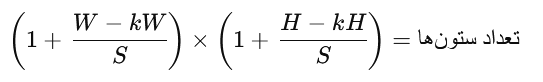

این مقدار همان تعداد مکان‌هایی است که کرنل می‌تواند به‌صورت گسسته (با گام S) روی تصویر قرار گیرد.

</div>

- **Question 2:**
What will be the number of rows in the im2col matrix?

  **Answer:**

<div dir=rtl>

فرض کنیم کرنل اندازه‌ای برابر با kH × kW دارد. در این صورت، تعداد کل عناصر کرنل برابر است با:
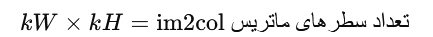

هر بار که کرنل روی تصویر حرکت می‌کند، یک ناحیه‌ی هم‌اندازه با کرنل از تصویر انتخاب می‌شود (یک patch). این ناحیه به صورت یک بردار ستونی (فلت‌شده) در می‌آید و در یکی از ستون‌های ماتریس im2col قرار می‌گیرد. بنابراین، برای اینکه بتوان این وصله‌ها را در یک ماتریس نمایش داد، باید هر ستون به اندازه تعداد عناصر کرنل (یعنی kH × kW) سطر داشته باشد.

</div>


In [ ]:
import numpy as np

def convolve_2d_im2col(image, kernel, stride=1, pad=0):

    # Obtain the dimensions of the image and kernel
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Calculate the dimensions of the output matrix
    out_height = (image_height + 2 * pad - kernel_height) // stride + 1
    out_width = (image_width + 2 * pad - kernel_width) // stride + 1

    # Pad the image
    padded_image = np.pad(image, ((pad, pad), (pad, pad)), mode='constant', constant_values=0)

    # Create the im2col matrix
    image_cols = np.zeros((kernel_height * kernel_width, out_height * out_width))

    for y in range(out_height):
        for x in range(out_width):
            patch = padded_image[y*stride:y*stride+kernel_height, x*stride:x*stride+kernel_width]
            image_cols[:, y*out_width + x] = patch.flatten()

    # Flatten the kernel
    kernel_flat = kernel.flatten()

    # Perform the convolution using matrix multiplication
    output_flat = kernel_flat @ image_cols

    # Reshape the output to the correct dimensions
    output = output_flat.reshape(out_height, out_width)

    return output

In [ ]:
# Define a small image and kernel for testing
image = np.array([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12],
    [13, 14, 15, 16]
])

kernel = np.array([
    [1, 0],
    [0, -1]
])

# Hyperparameters for convolution
stride = 1
pad = 1



# Sanity check
print("Sanity Check: Comparing Results for 2D Convolution")

# Perform convolution using four loops
result_four_loops = convolve_2d_four_loops(image, kernel, stride=stride, pad=pad)
print("Four loops:\n", result_four_loops)

# Perform convolution using two loops and vectorized operations
result_two_loops = convolve_2d_two_loops(image, kernel, stride=stride, pad=pad)
print("Two loops:\n", result_two_loops)

# Perform convolution using im2col transformation
result_im2col = convolve_2d_im2col(image, kernel, stride=stride, pad=pad)
print("im2col method:\n", result_im2col)




# Compare the results
if (np.allclose(result_four_loops, result_two_loops) and
    np.allclose(result_two_loops, result_im2col)):
    print("Sanity Check Passed: All methods produce similar results.")
else:
    print("Sanity Check Failed: The methods produce different results.")


Sanity Check: Comparing Results for 2D Convolution
Four loops:
 [[ -1  -2  -3  -4   0]
 [ -5  -5  -5  -5   4]
 [ -9  -5  -5  -5   8]
 [-13  -5  -5  -5  12]
 [  0  13  14  15  16]]
Two loops:
 [[ -1  -2  -3  -4   0]
 [ -5  -5  -5  -5   4]
 [ -9  -5  -5  -5   8]
 [-13  -5  -5  -5  12]
 [  0  13  14  15  16]]
im2col method:
 [[ -1.  -2.  -3.  -4.   0.]
 [ -5.  -5.  -5.  -5.   4.]
 [ -9.  -5.  -5.  -5.   8.]
 [-13.  -5.  -5.  -5.  12.]
 [  0.  13.  14.  15.  16.]]
Sanity Check Passed: All methods produce similar results.


In [ ]:
import numpy as np
import timeit

def benchmark_2d_convolution(image_height, image_width, kernel_height, kernel_width, stride, pad, iterations):
    np.random.seed(42)
    random_image = np.random.rand(image_height, image_width)
    random_kernel = np.random.rand(kernel_height, kernel_width)

    # Measure the execution time for each method
    time_four_loops = timeit.timeit(
        lambda: convolve_2d_four_loops(random_image, random_kernel, stride, pad),
        number=iterations
    ) / iterations
    time_two_loops = timeit.timeit(
        lambda: convolve_2d_two_loops(random_image, random_kernel, stride, pad),
        number=iterations
    ) / iterations
    time_im2col = timeit.timeit(
        lambda: convolve_2d_im2col(random_image, random_kernel, stride, pad),
        number=iterations
    ) / iterations

    return (time_four_loops, time_two_loops, time_im2col)

# Input the number of iterations
num_iterations = 100

# Run benchmark and print results
image_height = 100
image_width = 100
kernel_height = 8
kernel_width = 8
stride = 1
pad = 2
avg_times = benchmark_2d_convolution(image_height, image_width, kernel_height, kernel_width, stride, pad, num_iterations)
print(f"\nAverage times over {num_iterations} iterations (in seconds):")
print(f"Four loops: {avg_times[0]}")
print(f"Two loops: {avg_times[1]}")
print(f"im2col: {avg_times[2]}")



Average times over 100 iterations (in seconds):
Four loops: 0.47590169185999914
Two loops: 0.08823768686000222
im2col: 0.04876369036999677


### **Assignment Questions for 2D Convolution**

#### **1. Performance Comparison of 2D Convolution Methods**

After running the 2D convolution methods (four loops, two loops, and `im2col`), compare the average times. Which method was the fastest, and which was the slowest? Explain why this might be the case based on the underlying algorithm and memory usage of each method.

**Answer:**

<div dir=rtl>

بر اساس زمان‌های میانگین، روش im2col سریع‌ترین (0.0046 ثانیه) و روش چهار حلقه کندترین (0.0333 ثانیه) بود.

1.  **چهار حلقه:** به دلیل استفاده از چهار حلقه تو در تو برای پیمایش تمام پیکسل‌های خروجی و عناصر کرنل، سربار محاسباتی بالایی دارد.
2.  **دو حلقه:** با کاهش یک سطح از حلقه‌های پیمایش کرنل به ضرب برداری، عملکرد بهتری نسبت به چهار حلقه دارد اما همچنان سربار حلقه‌های پایتون قابل توجه است.
3.  **im2col:** با تبدیل عملیات کانولوشن به ضرب ماتریسی، از محاسبات برداری بهینه شده NumPy بهره می‌برد و به همین دلیل سریع‌تر است. این روش ممکن است مصرف حافظه بیشتری داشته باشد زیرا یک ماتریس میانی بزرگتر ایجاد می‌کند.
</div>

---

#### **2. Effect of Stride and Padding on Performance**

Try changing the values of `stride` and `pad`. How do these changes affect the performance of the different convolution methods? Which method shows the most significant performance change with varying stride and padding?

**Answer:**

<div dir=rtl>

**Stride:** افزایش گام منجر به کاهش تعداد محاسبات و در نتیجه بهبود عملکرد همه روش‌ها می‌شود، زیرا کرنل با گام‌های بزرگتری روی تصویر حرکت می‌کند. روش‌هایی که از حلقه‌های صریح استفاده می‌کنند (چهار و دو حلقه) احتمالاً کاهش زمان بیشتری را نشان می‌دهند زیرا تعداد تکرار حلقه‌ها مستقیماً کاهش می‌یابد.

**Padding:** افزایش حاشیه‌گذاری منجر به افزایش اندازه تصویر ورودی می‌شود و در نتیجه تعداد محاسبات را برای همه روش‌ها افزایش می‌دهد و عملکرد را کندتر می‌کند. روش im2col ممکن است به دلیل افزایش اندازه ماتریس میانی، تأثیر بیشتری را نشان دهد.
</div>
---

#### **3. Scaling with Image and Kernel Size**

Change the `image_height`, `image_width`, `kernel_height`, and `kernel_width` values (e.g., double both). How does the performance scale with the size of the image and kernel? Which method is most affected by these changes?

**Answer:**

<div dir=rtl>

 با دو برابر شدن اندازه تصویر و کرنل، زمان اجرای همه روش‌ها افزایش می‌یابد.

  روش‌های چهار حلقه و دو حلقه به شدت تحت تأثیر قرار می‌گیرند زیرا پیچیدگی زمانی
  آنها به طور مستقیم با حاصلضرب ابعاد تصویر و کرنل مرتبط است.

  روش ``im2col`` نیز تحت تأثیر قرار می‌گیرد زیرا اندازه ماتریس میانی ``image_cols`` به طور قابل توجهی افزایش می‌یابد و ضرب ماتریسی بزرگتری مورد نیاز است. با این حال، به دلیل بهره‌مندی از محاسبات برداری، احتمالاً مقیاس‌پذیری بهتری نسبت به روش‌های مبتنی بر حلقه خواهد داشت.
</div>
---

#### **4. When to Use `im2col` Method**

Based on your experiments, when would you prefer to use the `im2col` method over the other methods? Consider factors like image size, kernel size, stride, padding, and computational efficiency.

**Answer:**

<div dir=rtl>

روش im2col زمانی ترجیح داده می‌شود که:

 اندازه تصویر و کرنل نسبتاً بزرگ باشند، زیرا در این حالت مزایای محاسبات برداری ماتریسی بیشتر نمایان می‌شود.

کارایی محاسباتی اولویت داشته باشد، به خصوص در کاربردهایی مانند شبکه‌های عصبی کانولوشنال که سرعت آموزش و استنتاج بسیار مهم است.

در واقع برای تصاویر و کرنل‌های بسیار کوچک، سربار ایجاد ماتریس im2col ممکن است بیشتر از مزایای ضرب ماتریسی باشد و روش‌های مبتنی بر حلقه ساده‌تر ممکن است عملکرد بهتری داشته باشند.
</div>
---

#### **5. Interpretation of Results for Small Image and Kernel Sizes**

For smaller image and kernel sizes, performance differences may be less noticeable. Can you explain why some methods, such as `im2col`, might not always be the best choice when working with small inputs?

**Answer:**


<div dir=rtl>

این به این دلیل است که:

  سربار حلقه‌های پایتون در روش‌های چهار و دو حلقه در مقایسه با سربار ایجاد و مدیریت ماتریس بزرگ im2col می‌تواند کمتر باشد.

  مزایای محاسبات برداری ماتریسی در im2col برای ماتریس‌های کوچک به اندازه کافی قابل توجه نیست تا بر سربار آن غلبه کند. در واقع، ایجاد ماتریس بزرگ im2col و سپس ضرب آن ممکن است برای ورودی‌های کوچک، عملیات بیشتری نسبت به انجام مستقیم کانولوشن با حلقه‌ها داشته باشد.
</div>
---


In [ ]:
from skimage import io, color
from skimage.transform import resize
import matplotlib.pyplot as plt

# Load and preprocess image
def load_and_preprocess_image(image_path, new_size=(325, 500)):
    image = io.imread(image_path)
    if len(image.shape) == 3:  # Check if the image is in color
        image = color.rgb2gray(image)
    image = resize(image, new_size, mode='reflect')
    return image

# Display images
def display_images(original, convolved_images, titles):
    num_convolutions = len(convolved_images)
    num_rows = (num_convolutions + 1) // 2  # Calculate number of rows needed for the grid
    fig_width = 12
    fig_height = 6 + 3 * num_rows  # Adjust height dynamically based on the number of rows

    fig, axes = plt.subplots(num_rows + 1, 2, figsize=(fig_width, fig_height))

    # Flatten the axes array for easy indexing
    axes = axes.flatten()

    # Display original image
    axes[0].imshow(original, cmap='gray')
    axes[0].set_title("Original Image", fontsize=14)
    axes[0].axis('off')

    # Display convolved images
    for i, (img, title) in enumerate(zip(convolved_images, titles), start=1):
        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(title, fontsize=12)
        axes[i].axis('off')
        # Adding border to highlight the images
        axes[i].spines['top'].set_color('blue')
        axes[i].spines['top'].set_linewidth(2)
        axes[i].spines['right'].set_color('blue')
        axes[i].spines['right'].set_linewidth(2)
        axes[i].spines['bottom'].set_color('blue')
        axes[i].spines['bottom'].set_linewidth(2)
        axes[i].spines['left'].set_color('blue')
        axes[i].spines['left'].set_linewidth(2)

    # Hide any unused axes
    for ax in axes[len(convolved_images) + 1:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

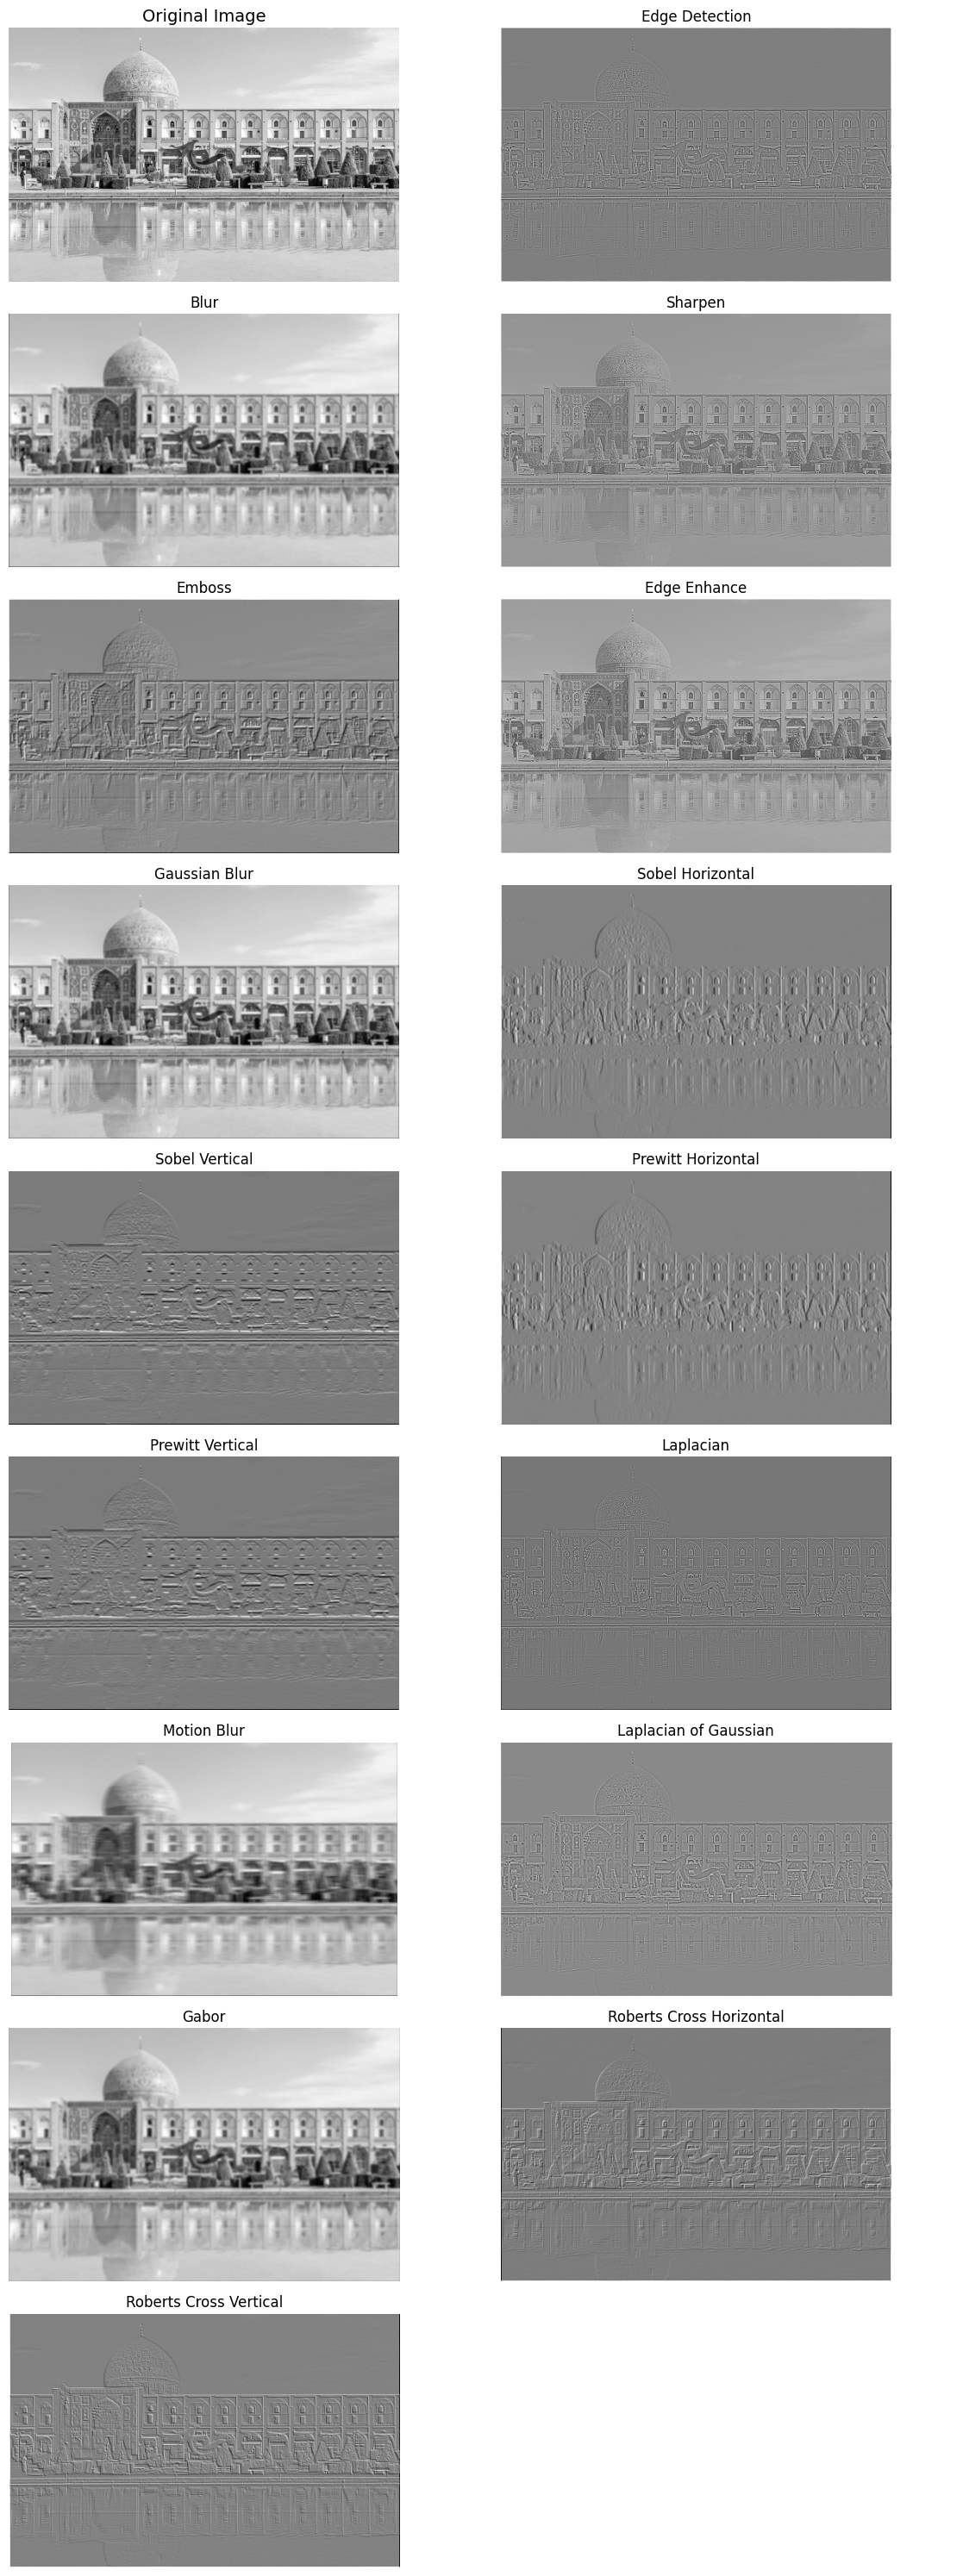

In [ ]:
import matplotlib.pyplot as plt
image_path = '/content/naqsh-e-jahan-square.jpg'
image = load_and_preprocess_image(image_path)

# Define kernels

kernels = {
    "Edge Detection": np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]),
    "Blur": np.ones((3, 3)) / 9,
    "Sharpen": np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]),
    "Emboss": np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]]),
    "Edge Enhance": np.array([[0, -0.5, 0], [-0.5, 3, -0.5], [0, -0.5, 0]]),
    "Gaussian Blur": np.array([[1/16, 1/8, 1/16], [1/8, 1/4, 1/8], [1/16, 1/8, 1/16]]),
    "Sobel Horizontal": np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]),
    "Sobel Vertical": np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]),
    "Prewitt Horizontal": np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]),
    "Prewitt Vertical": np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]),
    "Laplacian": np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]]),
    "Motion Blur": np.array([[1/9]*9] * 3),  # 3x3 motion blur
    "Laplacian of Gaussian": np.array([[0, 0, -1, 0, 0], [0, -1, -2, -1, 0], [-1, -2, 16, -2, -1], [0, -1, -2, -1, 0], [0, 0, -1, 0, 0]]),
    "Gabor": np.array([[1, 4, 6, 4, 1], [4, 11, 16, 11, 4], [6, 16, 25, 16, 6], [4, 11, 16, 11, 4], [1, 4, 6, 4, 1]]),
    "Roberts Cross Horizontal": np.array([[1, 0], [0, -1]]),
    "Roberts Cross Vertical": np.array([[0, 1], [-1, 0]]),
}

convolved_images = []
titles = []

for title, kernel in kernels.items():
    convolved_img = convolve_2d_two_loops(image, kernel, stride=1, pad=1)  # Adjust stride and pad as needed
    convolved_images.append(convolved_img)
    titles.append(title)

display_images(image, convolved_images, titles)

<br>
<font>
<div dir="ltr" align="center">
    <br>
    <font color="blue" size="7" style="font-family:Arial, sans-serif;">
        Section #2<br>
    </font>
</div>


<br>
<font>
<div dir="ltr" align="center">
    <br>
    <font color="purple" size="6" style="font-family:Arial, sans-serif;">
        Part A<br>
    </font>
</div>


Noisy image saved to noisy_image.jpg
Denoised image saved to denoised_image.jpg
--- Original Image ---


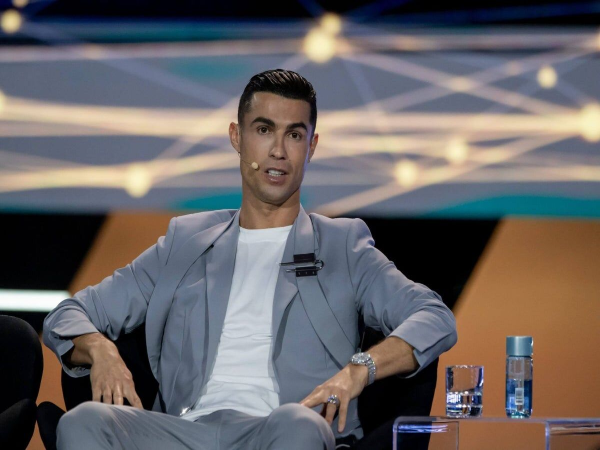

--- Noisy Image ---


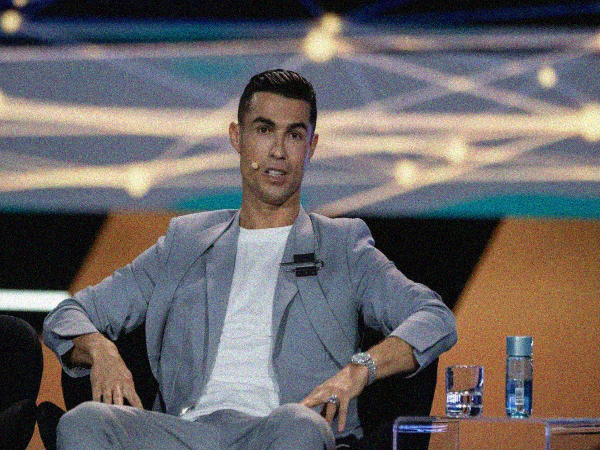

--- Denoised Image ---


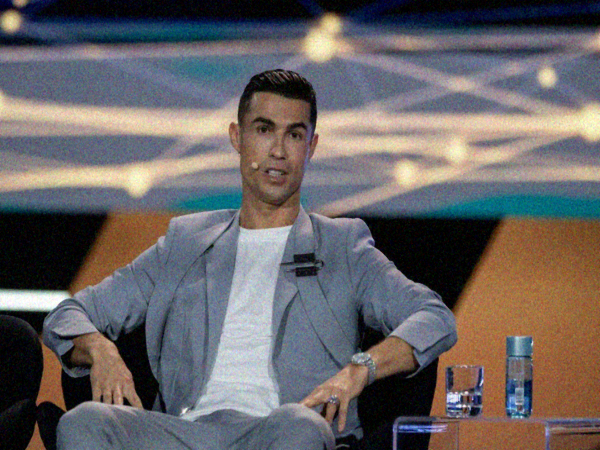

In [ ]:
import cv2
import numpy as np
import os

def add_gaussian_noise(image, mean=0, std=25):
    """Adds Gaussian noise to an image."""
    noisy_image = image.astype(np.float32)
    noise = np.random.normal(mean, std, noisy_image.shape)
    noisy_image += noise
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    return noisy_image

def apply_median_filter(image, kernel_size=3):
    """Applies a median filter to an image."""
    if kernel_size % 2 == 0:
        print("Warning: Median filter kernel size should typically be odd. Using size 3 instead.")
        kernel_size = 3
    median_filtered_image = cv2.medianBlur(image, kernel_size)
    return median_filtered_image

def denoise_image_and_show(image_path, output_noisy_path="noisy_image.jpg", output_denoised_path="denoised_image.jpg", display_size=(200, 150)):
    """
    Adds Gaussian noise to an image, applies a median filter for denoising,
    saves the original, noisy, and denoised images, and displays them with titles in a specified size.
    """
    try:
        # 1. Load the image
        original_image = cv2.imread(image_path)
        if original_image is None:
            print(f"Error: Could not load image from {image_path}. Creating a dummy image instead.")
            original_image = np.zeros((100, 100, 3), dtype=np.uint8) + 200
            cv2.imwrite(image_path, original_image)  # Save the dummy image

        # 2. Add Gaussian noise
        noisy_image = add_gaussian_noise(original_image)
        cv2.imwrite(output_noisy_path, noisy_image)
        print(f"Noisy image saved to {output_noisy_path}")

        # 3. Apply median filter for denoising
        denoised_image = apply_median_filter(noisy_image, kernel_size=3)
        cv2.imwrite(output_denoised_path, denoised_image)
        print(f"Denoised image saved to {output_denoised_path}")

        # 4. Display the images with titles and specified size
        images_to_show = [
            ("Original", original_image),
            ("Noisy", noisy_image),
            ("Denoised", denoised_image)
        ]

        try:
            from google.colab.patches import cv2_imshow
            for title, img in images_to_show:
                resized_img = cv2.resize(img, display_size)
                print(f"--- {title} Image ---")
                cv2_imshow(resized_img)
        except ImportError:
            for title, img in images_to_show:
                resized_img = cv2.resize(img, display_size)
                cv2.imshow(title, resized_img)
            cv2.waitKey(0)
            cv2.destroyAllWindows()

    except Exception as e:
        print(f"An error occurred: {e}")

image_path = '/content/cristiano_ronaldo.jpg'
denoise_image_and_show(image_path, display_size=(600, 450))

<br>
<font>
<div dir="ltr" align="center">
    <br>
    <font color="purple" size="6" style="font-family:Arial, sans-serif;">
        Part B<br>
    </font>
</div>


Sobel edges saved to edge_detected_images/sobel_edges.jpg
Canny edges saved to edge_detected_images/canny_edges.jpg
--- Original Image ---


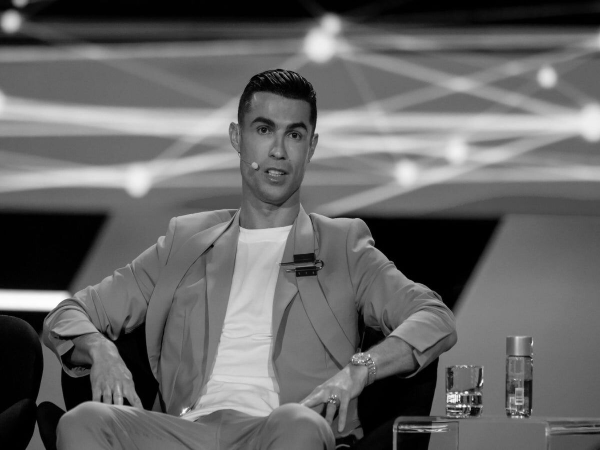

--- Sobel Edges Image ---


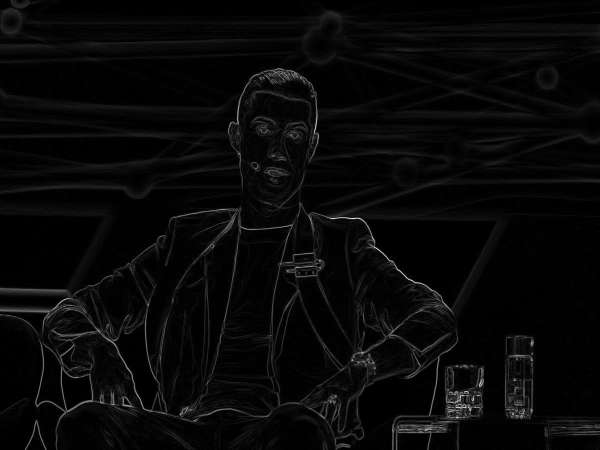

--- Canny Edges Image ---


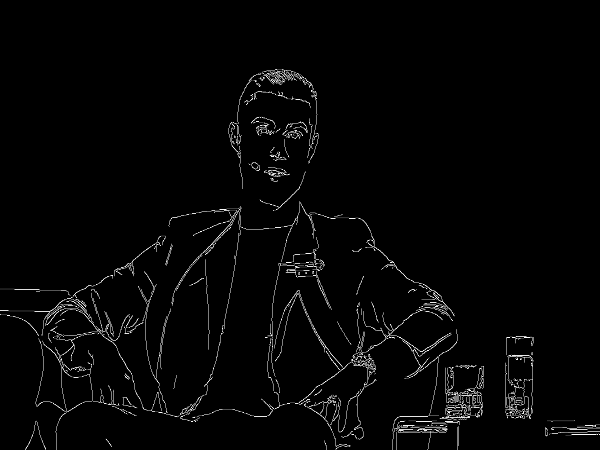

In [ ]:
import cv2
import numpy as np
import os

def detect_edges_sobel(image):
    """Applies the Sobel operator to detect edges in an image."""
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    sobel_magnitude = np.sqrt(sobelx**2 + sobely**2)
    sobel_edges = np.uint8(cv2.normalize(sobel_magnitude, None, 0, 255, cv2.NORM_MINMAX))
    return sobel_edges

def detect_edges_canny(image, low_threshold=100, high_threshold=200):
    """Applies the Canny edge detector to an image."""
    canny_edges = cv2.Canny(image, low_threshold, high_threshold)
    return canny_edges

def detect_and_show_edges(image_path, output_dir="edge_detected_images", display_size=(800, 600)):
    """
    Loads an image, applies Sobel and Canny edge detection,
    saves and displays the edge-detected images with titles in a specified size.
    """
    try:
        # 1. Load the original image (grayscale)
        original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if original_image is None:
            print(f"Error: Could not load image from {image_path}")
            return

        # 2. Create the output directory
        os.makedirs(output_dir, exist_ok=True)

        # 3. Apply Sobel edge detection
        sobel_edges = detect_edges_sobel(original_image)
        sobel_output_path = os.path.join(output_dir, "sobel_edges.jpg")
        cv2.imwrite(sobel_output_path, sobel_edges)
        print(f"Sobel edges saved to {sobel_output_path}")

        # 4. Apply Canny edge detection
        canny_edges = detect_edges_canny(original_image)
        canny_output_path = os.path.join(output_dir, "canny_edges.jpg")
        cv2.imwrite(canny_output_path, canny_edges)
        print(f"Canny edges saved to {canny_output_path}")

        # 5. Display the images with titles and specified size
        images_to_show = [
            ("Original", original_image),
            ("Sobel Edges", sobel_edges),
            ("Canny Edges", canny_edges)
        ]

        try:
            from google.colab.patches import cv2_imshow
            for title, img in images_to_show:
                resized_img = cv2.resize(img, display_size)
                print(f"--- {title} Image ---")
                cv2_imshow(resized_img)
        except ImportError:
            for title, img in images_to_show:
                resized_img = cv2.resize(img, display_size)
                cv2.imshow(title, resized_img)
            cv2.waitKey(0)
            cv2.destroyAllWindows()

    except Exception as e:
        print(f"An error occurred: {e}")

image_file_path = '/content/cristiano_ronaldo.jpg'
detect_and_show_edges(image_file_path, display_size=(600, 450))

<br>
<font>
<div dir="ltr" align="center">
    <br>
    <font color="purple" size="6" style="font-family:Arial, sans-serif;">
        Part C<br>
    </font>
</div>


Sharpened image saved to sharpened_image.jpg
--- Original Image ---


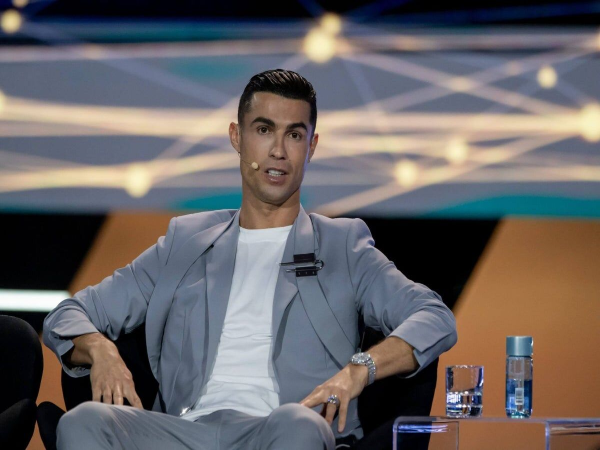

--- Sharpened Image ---


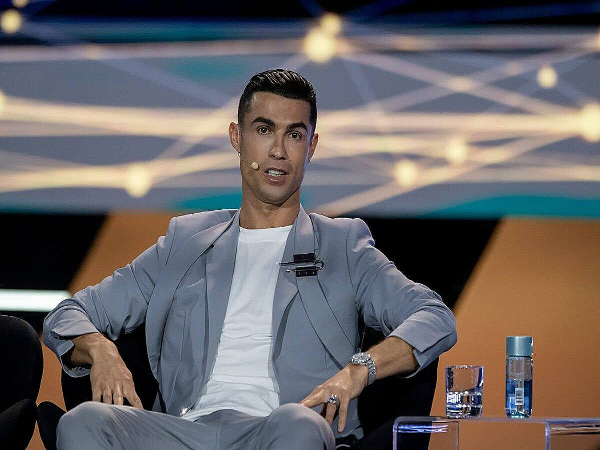

In [ ]:
import cv2
import numpy as np
import os

def sharpen_image(image):
    """Applies a sharpening filter to an image."""
    sharpen_kernel = np.array([[0, -1, 0],
                               [-1, 5, -1],
                               [0, -1, 0]])
    sharpened_image = cv2.filter2D(image, -1, sharpen_kernel)
    return sharpened_image

def sharpen_and_show_image(image_path, output_dir="sharpened_images", display_size=(400, 300)):
    """
    Loads an image, applies a sharpening filter, saves and displays
    the original and sharpened images side-by-side with a title and specified size.
    """
    try:
        # 1. Load the image
        original_image = cv2.imread(image_path)
        if original_image is None:
            print(f"Error: Could not load image from {image_path}. Creating a dummy image instead.")
            original_image = np.zeros((300, 400, 3), dtype=np.uint8) + 150
            cv2.imwrite(image_path, original_image)

        # 2. Apply sharpening filter
        sharpened_image = sharpen_image(original_image)

        # 3. Save the sharpened image
        sharpened_output_path = "sharpened_image.jpg"
        cv2.imwrite(sharpened_output_path, sharpened_image)
        print(f"Sharpened image saved to {sharpened_output_path}")

        # 4. Display the original and sharpened images side-by-side
        original_resized = cv2.resize(original_image, display_size)
        sharpened_resized = cv2.resize(sharpened_image, display_size)
        images_to_show = [("Original Image", original_resized), ("Sharpened Image", sharpened_resized)]

        try:
            from google.colab.patches import cv2_imshow
            for title, img in images_to_show:
                print(f"--- {title} ---")
                cv2_imshow(img)
        except ImportError:
            for title, img in images_to_show:
                cv2.imshow(title, img)
            cv2.waitKey(0)
            cv2.destroyAllWindows()

    except Exception as e:
        print(f"An error occurred: {e}")

image_file_path = '/content/cristiano_ronaldo.jpg'
sharpen_and_show_image(image_file_path, display_size=(600, 450))

<br>
<font>
<div dir="ltr" align="center">
    <br>
    <font color="purple" size="6" style="font-family:Arial, sans-serif;">
        Part D<br>
    </font>
</div>


<div dir=rtl>

تفاوت‌های بین محوکردن میانگین و محوکردن گاوسی:

- محوکردن میانگین، وزن مساوی را به همه پیکسل‌های داخل هسته اعمال می‌کند و در نتیجه، یک تاری یکنواخت ایجاد می‌شود.

- محوکردن گاوسی از یک تابع گاوسی استفاده می‌کند و به پیکسل‌های مرکزی وزن بیشتری می‌دهد و به پیکسل‌های اطراف وزن کمتری می‌دهد.

- محوکردن گاوسی تمایل دارد لبه‌ها را بهتر حفظ کند و در مقایسه با محوکردن میانگین، تاری نرم‌تر و طبیعی‌تری ایجاد کند.
    
- محوکردن میانگین گاهی اوقات می‌تواند به خصوص با اندازه‌های بزرگ هسته، تاری بلوکی یا کمتر پالایش شده ایجاد کند.
</div>


Average blurred image saved to blurred_images/average_blurred_image.jpg
Gaussian blurred image saved to blurred_images/gaussian_blurred_image.jpg
--- Original Image ---


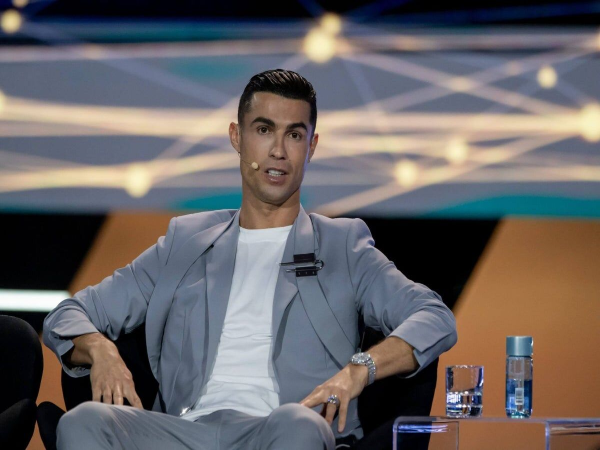

--- Average Blurred ---


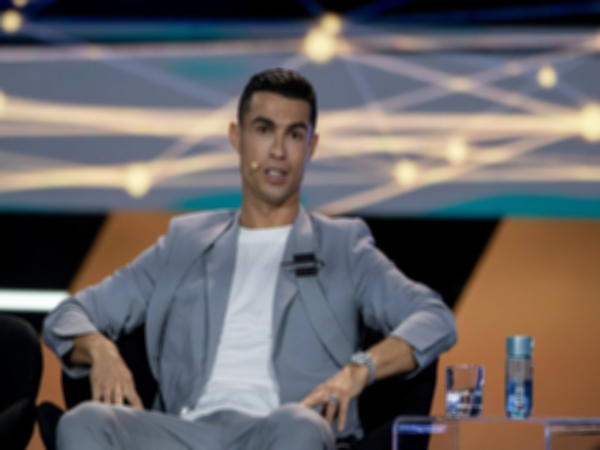

--- Gaussian Blurred ---


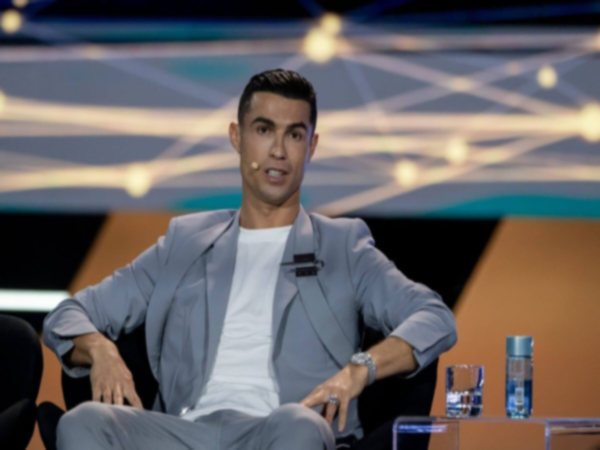

In [131]:
import cv2
import numpy as np
import os

def blur_image(image_path, output_dir="blurred_images", display_size=(800, 600)):
    """
    Loads an image, applies average and Gaussian blurring, saves the blurred images,
    and displays the original and blurred images.
    """
    try:
        # 1. Load the image
        original_image = cv2.imread(image_path)
        if original_image is None:
            print(f"Error: Could not load image from {image_path}. Creating a dummy image instead.")
            original_image = np.zeros((300, 400, 3), dtype=np.uint8) + 150
            cv2.imwrite(image_path, original_image)

        # 2. Create the output directory
        os.makedirs(output_dir, exist_ok=True)

        # 3. Apply Average Blur
        average_blurred_image = cv2.blur(original_image, (9, 9))  # Using a 5x5 kernel
        average_output_path = os.path.join(output_dir, "average_blurred_image.jpg")
        cv2.imwrite(average_output_path, average_blurred_image)
        print(f"Average blurred image saved to {average_output_path}")

        # 4. Apply Gaussian Blur
        gaussian_blurred_image = cv2.GaussianBlur(original_image, (9, 9), 0)  # Using a 5x5 kernel and sigmaX=0
        gaussian_output_path = os.path.join(output_dir, "gaussian_blurred_image.jpg")
        cv2.imwrite(gaussian_output_path, gaussian_blurred_image)
        print(f"Gaussian blurred image saved to {gaussian_output_path}")

        # 5. Display the images
        original_resized = cv2.resize(original_image, display_size)
        average_resized = cv2.resize(average_blurred_image, display_size)
        gaussian_resized = cv2.resize(gaussian_blurred_image, display_size)
        images_to_show = [
            ("Original Image", original_resized),
            ("Average Blurred", average_resized),
            ("Gaussian Blurred", gaussian_resized),
        ]

        try:
            from google.colab.patches import cv2_imshow
            for title, img in images_to_show:
                print(f"--- {title} ---")
                cv2_imshow(img)
        except ImportError:
            for title, img in images_to_show:
                cv2.imshow(title, img)
            cv2.waitKey(0)
            cv2.destroyAllWindows()

    except Exception as e:
        print(f"An error occurred: {e}")



image_file_path = '/content/cristiano_ronaldo.jpg'
blur_image(image_file_path, display_size=(600, 450))

<br>
<font>
<div dir="ltr" align="center">
    <br>
    <font color="purple" size="6" style="font-family:Arial, sans-serif;">
        Part E<br>
    </font>
</div>

Saved image: Edge Detection to part_E/Edge Detection.jpg
Saved image: Blur to part_E/Blur.jpg
Saved image: Sharpen to part_E/Sharpen.jpg
Saved image: Emboss to part_E/Emboss.jpg
Saved image: Edge Enhance to part_E/Edge Enhance.jpg
Saved image: Gaussian Blur to part_E/Gaussian Blur.jpg
Saved image: Sobel Horizontal to part_E/Sobel Horizontal.jpg
Saved image: Sobel Vertical to part_E/Sobel Vertical.jpg
Saved image: Prewitt Horizontal to part_E/Prewitt Horizontal.jpg
Saved image: Prewitt Vertical to part_E/Prewitt Vertical.jpg
Saved image: Laplacian to part_E/Laplacian.jpg
Saved image: Motion Blur to part_E/Motion Blur.jpg
Saved image: Laplacian of Gaussian to part_E/Laplacian of Gaussian.jpg
Saved image: Gabor to part_E/Gabor.jpg
Saved image: Roberts Cross Horizontal to part_E/Roberts Cross Horizontal.jpg
Saved image: Roberts Cross Vertical to part_E/Roberts Cross Vertical.jpg


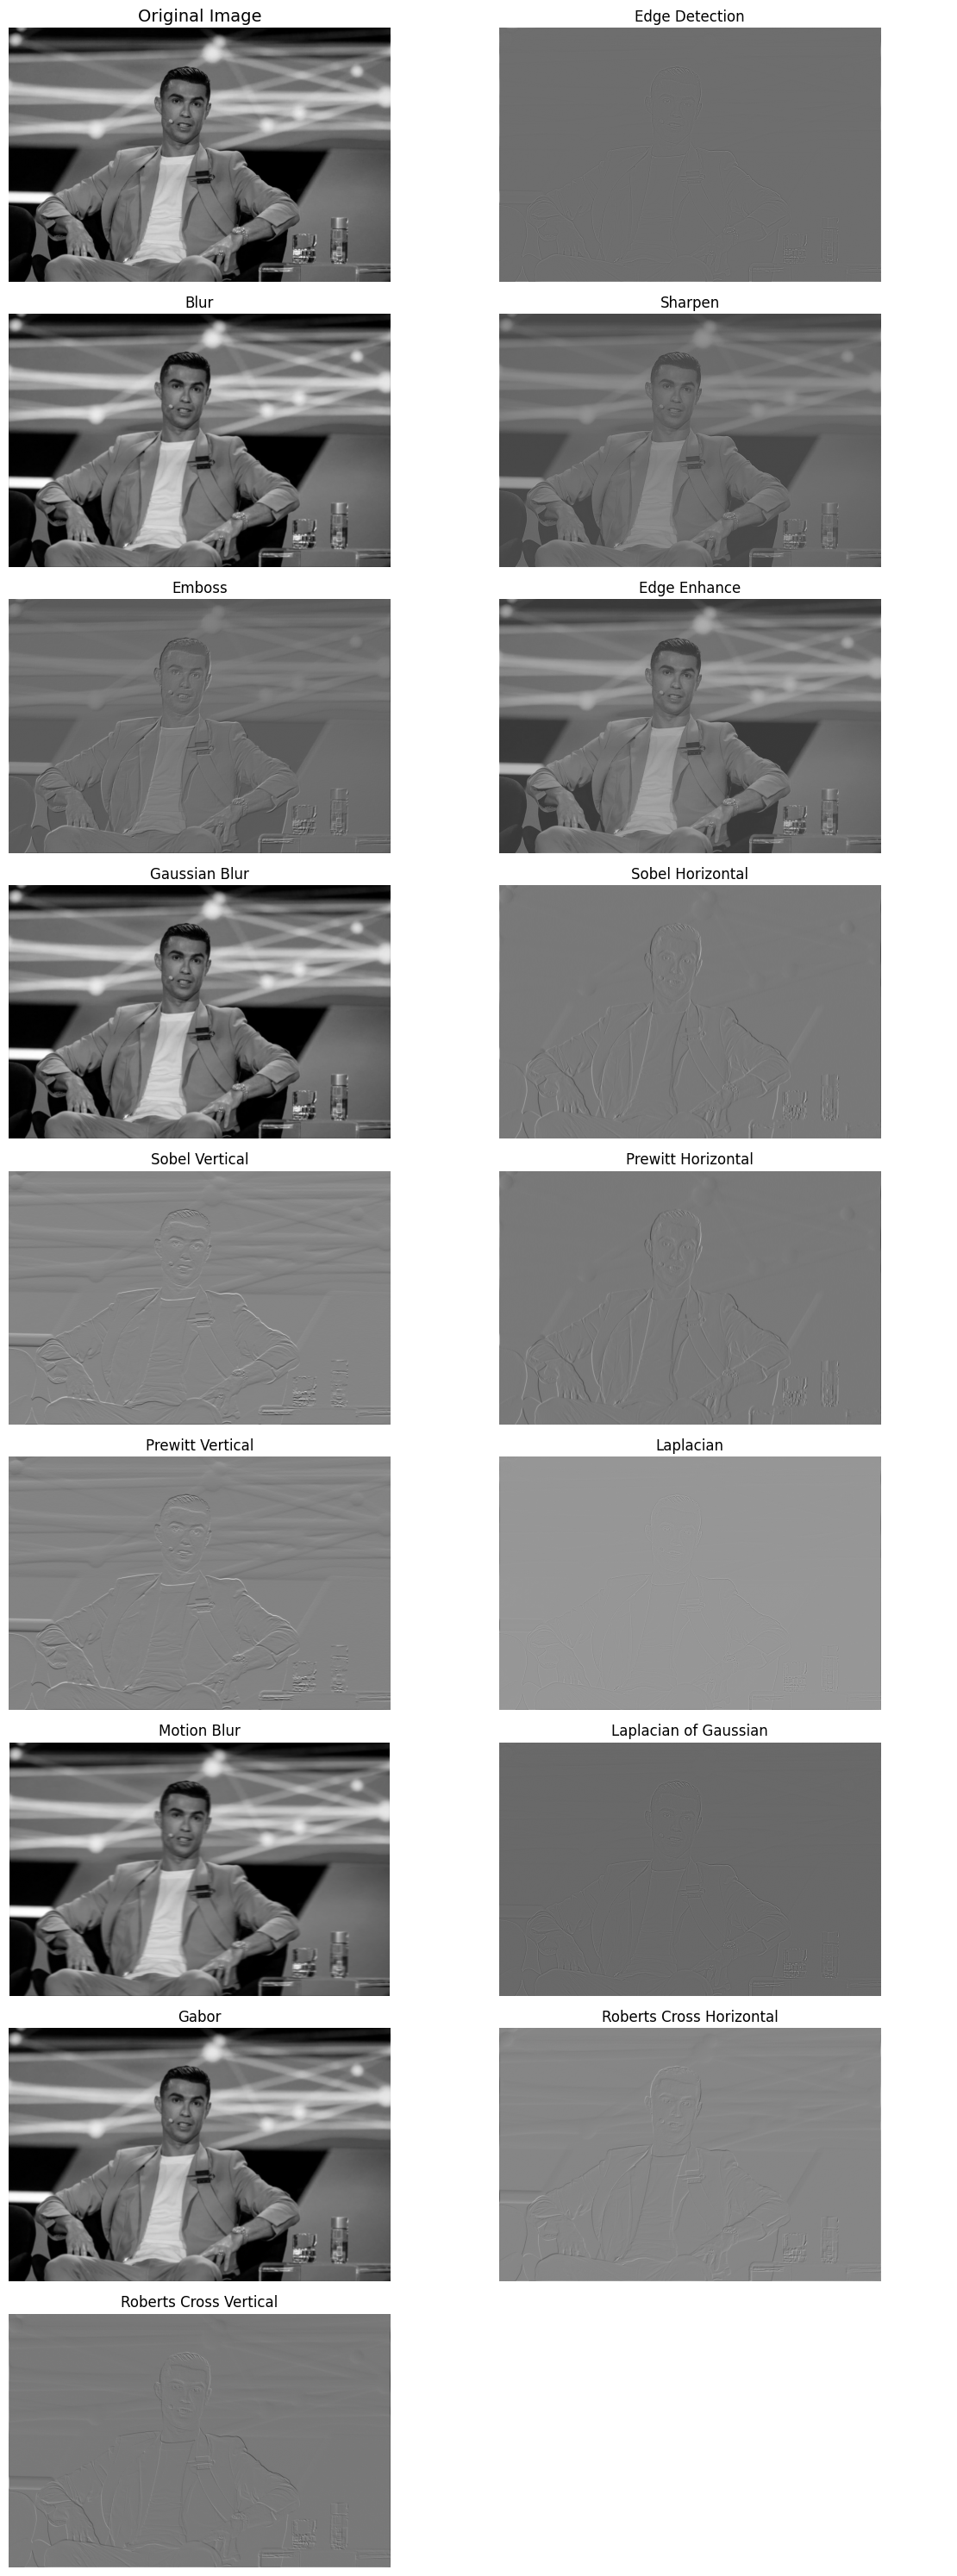

In [135]:
kernels = {
    "Edge Detection": np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]),
    "Blur": np.ones((3, 3)) / 9,
    "Sharpen": np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]),
    "Emboss": np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]]),
    "Edge Enhance": np.array([[0, -0.5, 0], [-0.5, 3, -0.5], [0, -0.5, 0]]),
    "Gaussian Blur": np.array([[1/16, 1/8, 1/16], [1/8, 1/4, 1/8], [1/16, 1/8, 1/16]]),
    "Sobel Horizontal": np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]),
    "Sobel Vertical": np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]),
    "Prewitt Horizontal": np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]),
    "Prewitt Vertical": np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]),
    "Laplacian": np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]]),
    "Motion Blur": np.array([[1/9]*9] * 3),  # 3x3 motion blur
    "Laplacian of Gaussian": np.array([[0, 0, -1, 0, 0], [0, -1, -2, -1, 0], [-1, -2, 16, -2, -1], [0, -1, -2, -1, 0], [0, 0, -1, 0, 0]]),
    "Gabor": np.array([[1, 4, 6, 4, 1], [4, 11, 16, 11, 4], [6, 16, 25, 16, 6], [4, 11, 16, 11, 4], [1, 4, 6, 4, 1]]),
    "Roberts Cross Horizontal": np.array([[1, 0], [0, -1]]),
    "Roberts Cross Vertical": np.array([[0, 1], [-1, 0]]),
}

def save_images_with_titles(images, titles, output_dir="part_E"):
    os.makedirs(output_dir, exist_ok=True)  # Create the directory

    for i, (image, title) in enumerate(zip(images, titles)):
        if not isinstance(image, np.ndarray):
            print(f"Warning: images[{i}] is not a valid image (NumPy array). Skipping.")
            continue  # Skip invalid images

        if not isinstance(title, str):
            print(f"Warning: titles[{i}] is not a string. Skipping image.")
            continue

        filename = f"{title}.jpg"  # Use .jpg for consistency and simplicity.  You could make this an argument if you want.
        output_path = os.path.join(output_dir, filename)
        try:
            cv2.imwrite(output_path, image)
            print(f"Saved image: {title} to {output_path}")
        except Exception as e:
            print(f"Error saving image {title}: {e}")


# Applying all Filters on Image
convolved_images = []
titles = []

image = cv2.imread('/content/cristiano_ronaldo.jpg')
image_gray = np.mean(image, axis=2)

for title, kernel in kernels.items():
    convolved_img = convolve_2d_im2col(image_gray, kernel, stride=1, pad=1)
    convolved_images.append(convolved_img)
    titles.append(title)

save_images_with_titles(convolved_images, titles)
display_images(image_gray, convolved_images, titles)

<div dir=rtl>
در نهایت باید بگویم که برای انجام این پروژه از ChatGPT , Gemini , همچنین برای برخی از پرسش ها، از اطلاعات موجود در اینترنت کمک گرفتم.
</div>